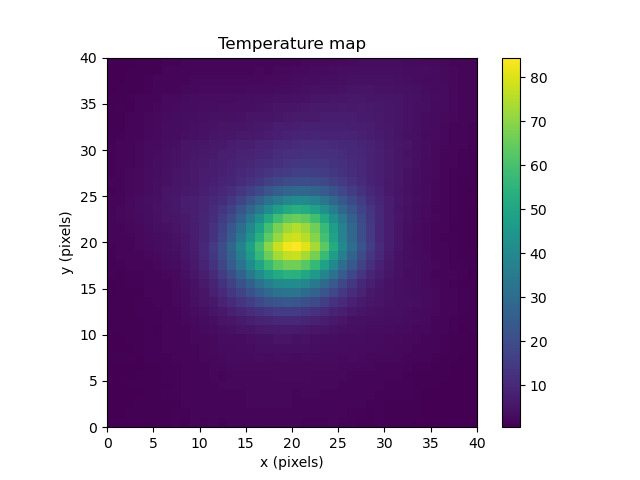

In [12]:
%matplotlib widget
from DataFitter import DataFitter
from SeriesAnalyzer_2 import SeriesAnalyzer_2
from BeamAnalysis import BeamAnalysis

HIKMICRO_dir_path = (
    '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250603/HIKMICRO_PowerSeries')

x_center_HIKMICRO = 152 - 1
y_center_HIKMICRO = 122
width = 40
measured_voltage_converted_from_lock_in_to_osciloscope_V_HIKMICRO = 1.05
angle_pol_voltage_measurement_HIKMICRO = 90
moved_pol = 'first'
crop_x_range_HIKMICRO = (x_center_HIKMICRO - width / 2, x_center_HIKMICRO + width / 2)
crop_y_range_HIKMICRO = (y_center_HIKMICRO - width / 2, y_center_HIKMICRO + width / 2)
filename = '90 degrees.csv'

beam_analysis_HIKMICRO = BeamAnalysis(dir_path=HIKMICRO_dir_path,
                                      signal_filename=filename,
                                      camera_name='HIKMICRO',
                                      crop_range_x_pixels=crop_x_range_HIKMICRO,
                                      crop_range_y_pixels=crop_y_range_HIKMICRO)
temperature_array = beam_analysis_HIKMICRO.map_array
fig_HIKMICRO, ax_HIKMICRO = beam_analysis_HIKMICRO.plot_map_in_pixels()
ax_HIKMICRO.set_title('Temperature map')
fig_HIKMICRO.savefig('Temperature_map.pdf')

Moved first polarizer
Total power: 6.818181818181818 uW


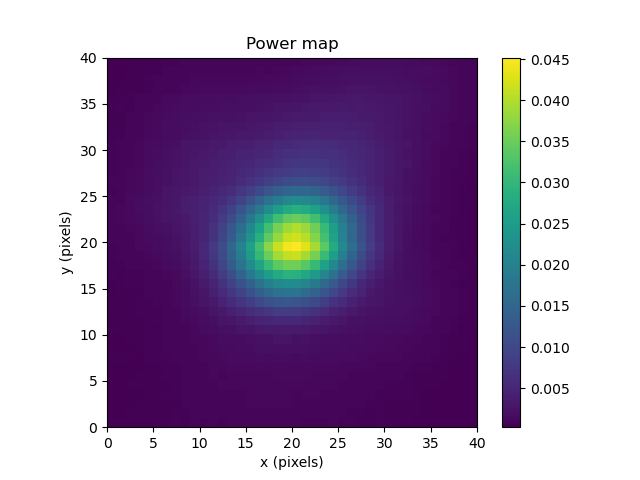

In [13]:
%matplotlib widget
HIKMICRO_SeriesAnalyzer = SeriesAnalyzer_2(dir_path=HIKMICRO_dir_path,
                                           camera_name='HIKMICRO',
                                           Y_ref_position_for_background_subtraction=2,
                                           crop_range_x_pixels=crop_x_range_HIKMICRO,
                                           crop_range_y_pixels=crop_y_range_HIKMICRO)

total_power =HIKMICRO_SeriesAnalyzer._extract_power_from_filename(filename=filename,
                                                          known_angle=angle_pol_voltage_measurement_HIKMICRO,
                                                          kown_voltage_at_known_angle_in_V=measured_voltage_converted_from_lock_in_to_osciloscope_V_HIKMICRO,
                                                          moved_polarizer=moved_pol)

power_map_array = HIKMICRO_SeriesAnalyzer._get_power_map_array(array_map=temperature_array,
                                                               power =total_power)
print(f'Total power: {total_power} uW')
fig_power_map, ax_power_map = HIKMICRO_SeriesAnalyzer.plot_map_in_pixels(power_map_array)
ax_power_map.set_title('Power map')
fig_power_map.savefig('Power_map.pdf')

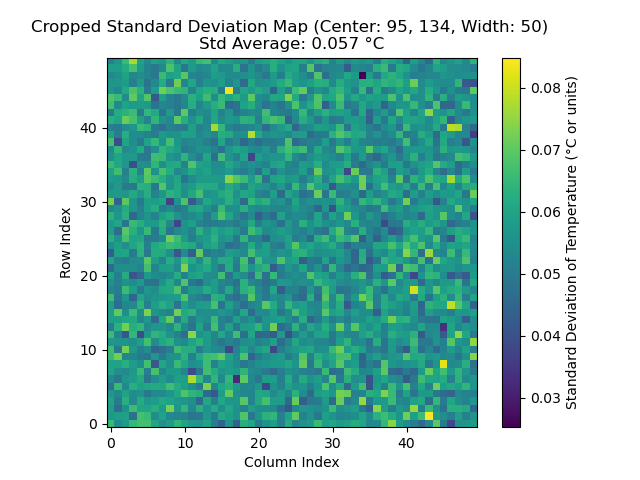

In [14]:
import numpy as np
from VideoAnalyzer import VideoAnalyzer
%matplotlib widget
csv_file_path = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250508/Noise_Analysis/video_25fps_closed_camera_300frames.csv'
cropping_center_x = 70 + 25
cropping_center_y = 134
cropping_width = 50
video_analysis = VideoAnalyzer(csv_file_path)
fig_copped, ax_cropped, cropped_std_dev_map = video_analysis.plot_std_dev_cropped(crop_width_pixels=cropping_width,
                                                                                  center_x=cropping_center_x,
                                                                                  center_y=cropping_center_y)
std_average = np.mean(cropped_std_dev_map)
fig_copped.savefig('std_dev_map.pdf')

Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer


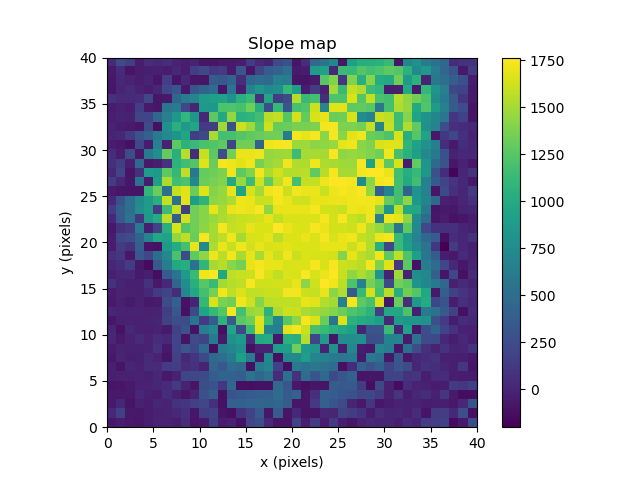

In [15]:

%matplotlib widget
import numpy as np



slope_map = HIKMICRO_SeriesAnalyzer.compute_slope_map(save_data_plot_bool=True,
                                                      known_angle=angle_pol_voltage_measurement_HIKMICRO,
                                                      kown_voltage_at_known_angle_in_V=measured_voltage_converted_from_lock_in_to_osciloscope_V_HIKMICRO,
                                                      moved_polarizer=moved_pol)
fig_slope, ax_slope = HIKMICRO_SeriesAnalyzer.plot_map_in_pixels(slope_map)
ax_slope.set_title('Slope map')
fig_slope.savefig('Slope_map.pdf')

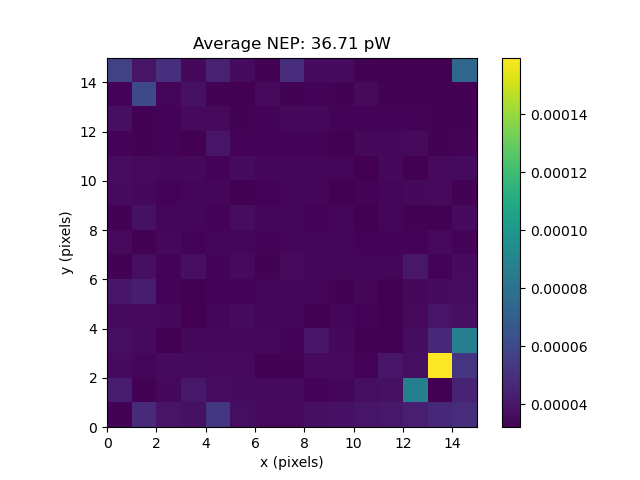

In [25]:
%matplotlib widget

def select_center_square(array_2d,
                         square_width):
    """
    Selects a square region from the middle of a 2D NumPy array.

    Args:
        array_2d (np.ndarray): The input 2D NumPy array.
        square_width (int): The desired width (and height) of the square region.
                            Should be an odd number for a perfect center,
                            or an even number (will be centered as best as possible).

    Returns:
        np.ndarray: The selected square region from the center of the array.
                    Returns None if the square_width is larger than array dimensions.
    """
    rows, cols = array_2d.shape

    if square_width > rows or square_width > cols:
        print(f"Error: square_width ({square_width}) is larger than array dimensions ({rows}x{cols}).")
        return None

    # Calculate center indices
    center_row = rows // 2
    center_col = cols // 2

    # Calculate half width, adjusting for even/odd square_width
    half_width_rows_start = square_width // 2
    half_width_rows_end = (square_width + 1) // 2  # Handles odd width correctly
    half_width_cols_start = square_width // 2
    half_width_cols_end = (square_width + 1) // 2

    # Calculate start and end indices for slicing
    start_row = center_row - half_width_rows_start
    end_row = center_row + half_width_rows_end
    start_col = center_col - half_width_cols_start
    end_col = center_col + half_width_cols_end

    # Ensure indices are within bounds (though the initial check should cover most cases)
    start_row = max(0,
                    start_row)
    end_row = min(rows,
                  end_row)
    start_col = max(0,
                    start_col)
    end_col = min(cols,
                  end_col)

    # Slice the array
    center_square = array_2d[start_row:end_row, start_col:end_col]

    return center_square


NEP_map = std_average / slope_map
#HIKMICRO_SeriesAnalyzer.plot_map_in_pixels(NEP_map)

square_width = 15
NEP_map_filtered = select_center_square(NEP_map,
                                        square_width=square_width)

# Plot the filtered map
fig_NEP, ax_NEP=HIKMICRO_SeriesAnalyzer.plot_map_in_pixels(NEP_map_filtered)
NEP_average_uW = np.mean(NEP_map_filtered)
NEP_average_pW = NEP_average_uW * 1e6
ax_NEP.set_title(f'Average NEP: {NEP_average_pW.round(2)} pW')
fig_NEP.savefig('NEP_map_filtered.pdf')

In [17]:
NEP_average_uW = np.mean(NEP_map_filtered)
NEP_average_pW = NEP_average_uW * 1e6
NEP_average_pW

36.70630904952706

loading: 20250616_154518_529_001_10_01_10.csv
loading: 20250616_154536_819_001_10_01_10.csv
loading: 20250616_154543_938_001_10_01_10.csv
loading: 20250616_154520_174_001_10_01_10.csv
loading: 20250616_154543_985_001_10_01_10.csv
loading: 20250616_154540_609_001_10_01_10.csv
loading: 20250616_154542_374_001_10_01_10.csv
loading: 20250616_154537_653_001_10_01_10.csv
loading: 20250616_154531_443_001_10_01_10.csv
loading: 20250616_154543_582_001_10_01_10.csv
loading: 20250616_154525_073_001_10_01_10.csv
loading: 20250616_154537_471_001_10_01_10.csv
loading: 20250616_154531_766_001_10_01_10.csv
loading: 20250616_154540_090_001_10_01_10.csv
loading: 20250616_154539_048_001_10_01_10.csv
loading: 20250616_154539_275_001_10_01_10.csv
loading: 20250616_154539_792_001_10_01_10.csv
loading: 20250616_154541_260_001_10_01_10.csv
loading: 20250616_154537_328_001_10_01_10.csv
loading: 20250616_154541_584_001_10_01_10.csv
loading: 20250616_154531_500_001_10_01_10.csv
loading: 20250616_154542_640_001_1

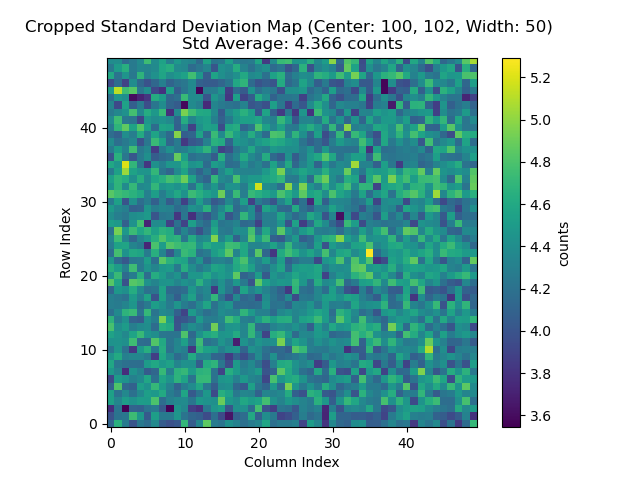

In [18]:
import numpy as np
from VideoAnalyzer_NEC import VideoAnalyzer_NEC
%matplotlib widget
video_path = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250616/NEC/video'
cropping_center_x = 100
cropping_center_y = 100+2
cropping_width = 50
video_analysis = VideoAnalyzer_NEC(video_directory = video_path)
fig_copped, ax_cropped, cropped_std_dev_map = video_analysis.plot_std_dev_cropped(crop_width_pixels=cropping_width,
                                                                                  center_x=cropping_center_x,
                                                                                  center_y=cropping_center_y)
std_average_NEC = np.mean(cropped_std_dev_map)
fig_copped.savefig('std_dev_map.pdf')

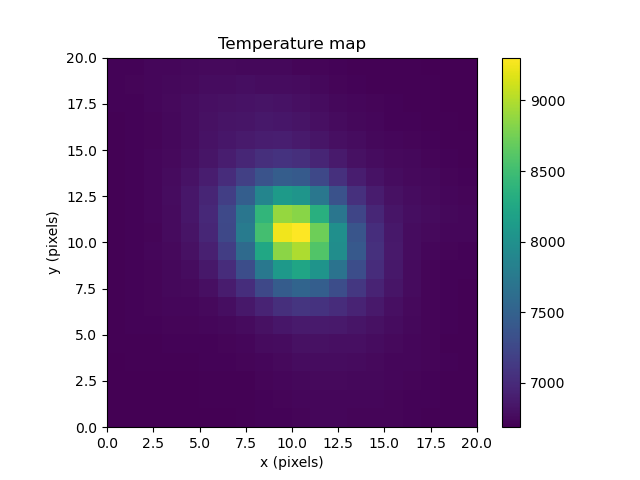

In [19]:
%matplotlib widget
from DataFitter import DataFitter
from SeriesAnalyzer_2 import SeriesAnalyzer_2
from BeamAnalysis import BeamAnalysis

NEC_dir_path = (
'/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250603/NEC_PowerSeries/all_measurements')

x_center_NEC = 122
y_center_NEC = 223
width = 20
measured_voltage_converted_from_lock_in_to_osciloscope_V_NEC = 1.05
angle_pol_voltage_measurement_NEC = 90
moved_pol = 'first'
crop_x_range_NEC = (x_center_NEC - width / 2, x_center_NEC + width / 2)
crop_y_range_NEC = (y_center_NEC - width / 2, y_center_NEC + width / 2)
filename = '50 degrees.csv'

beam_analysis_NEC = BeamAnalysis(dir_path=NEC_dir_path,
                                      signal_filename=filename,
                                      camera_name='NEC',
                                      crop_range_x_pixels=crop_x_range_NEC,
                                      crop_range_y_pixels=crop_y_range_NEC)
temperature_array = beam_analysis_NEC.map_array
fig_NEC, ax_NEC = beam_analysis_NEC.plot_map_in_pixels()
ax_NEC.set_title('Temperature map')
fig_NEC.savefig('Temperature_map.pdf')

Moved first polarizer
Total power: 3.126268451714175 uW


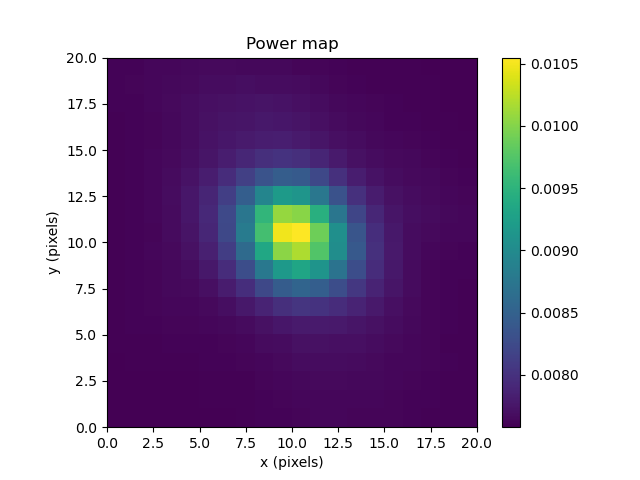

In [20]:
%matplotlib widget
NEC_SeriesAnalyzer = SeriesAnalyzer_2(dir_path=NEC_dir_path,
                                           camera_name='NEC',
                                           Y_ref_position_for_background_subtraction=2,
                                           crop_range_x_pixels=crop_x_range_NEC,
                                           crop_range_y_pixels=crop_y_range_NEC)

total_power =NEC_SeriesAnalyzer._extract_power_from_filename(filename=filename,
                                                          known_angle=angle_pol_voltage_measurement_NEC,
                                                          kown_voltage_at_known_angle_in_V=measured_voltage_converted_from_lock_in_to_osciloscope_V_NEC,
                                                          moved_polarizer=moved_pol)

power_map_array = NEC_SeriesAnalyzer._get_power_map_array(array_map=temperature_array,
                                                               power =total_power)
print(f'Total power: {total_power} uW')
fig_power_map, ax_power_map = NEC_SeriesAnalyzer.plot_map_in_pixels(power_map_array)
ax_power_map.set_title('Power map')
fig_power_map.savefig('Power_map.pdf')

Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer


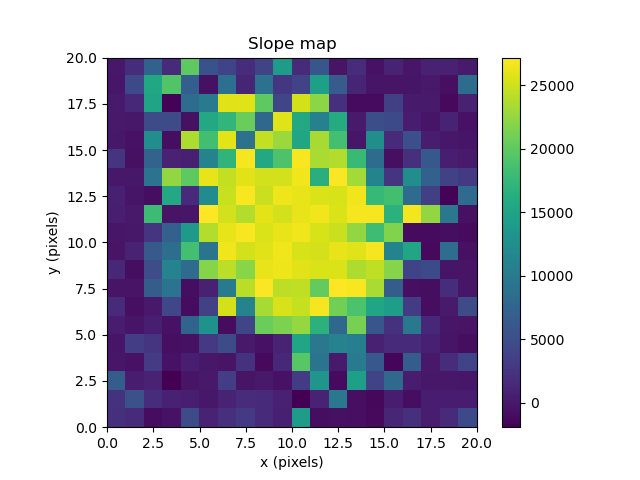

In [29]:
%matplotlib widget
import numpy as np



slope_map_NEC = NEC_SeriesAnalyzer.compute_slope_map(save_data_plot_bool=True,
                                                      known_angle=angle_pol_voltage_measurement_NEC,
                                                      kown_voltage_at_known_angle_in_V=measured_voltage_converted_from_lock_in_to_osciloscope_V_NEC,
                                                      moved_polarizer=moved_pol)
fig_slope_NEC, ax_slope_NEC = NEC_SeriesAnalyzer.plot_map_in_pixels(slope_map_NEC)
ax_slope_NEC.set_title('Slope map')
fig_slope_NEC.savefig('Slope_map.pdf')

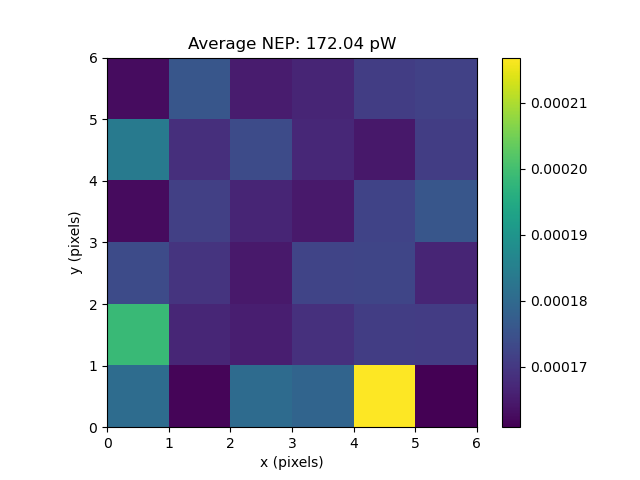

In [27]:
NEP_map_NEC = std_average_NEC / slope_map_NEC
#HIKMICRO_SeriesAnalyzer.plot_map_in_pixels(NEP_map)

square_width = 6
NEP_map_filtered_NEC = select_center_square(NEP_map_NEC,
                                        square_width=square_width)

# Plot the filtered map
fig_NEP_NEC, ax_NEP_NEC=NEC_SeriesAnalyzer.plot_map_in_pixels(NEP_map_filtered_NEC)
NEP_average_uW_NEC = np.mean(NEP_map_filtered_NEC)
NEP_average_pW_NEC = NEP_average_uW_NEC * 1e6
ax_NEP_NEC.set_title(f'Average NEP: {NEP_average_pW_NEC.round(2)} pW')
fig_NEP_NEC.savefig('NEP_map_filtered_NEC.pdf')